In [111]:
#TASK 1
import torch as tt

dt = tt.randint(-10, 41, (30,))
print("Random temperatures for 30 days: ")
print(dt.tolist())    
print("\n")

stations = ["Station A", "Station B", "Station C", "Station D", "Station E"]   

wd_c = tt.randint(-10, 41, (10, 5))
print("Weather Data for 5 stations in 10 days: \n", wd_c,"\n")


mean = tt.mean(wd_c.float(), dim=0)  
max = tt.max(wd_c, dim=0).values
min = tt.min(wd_c, dim=0).values


print("The mean, max and min for each of the 5 stations: ")

for i in range(len(stations)):
    print(f"{stations[i]}: Mean = {mean[i]:.1f} C, Max = {max[i]} C, Min = {min[i]} C")

Random temperatures for 30 days: 
[14, 40, -5, 8, 15, 38, 5, 6, 15, -5, 21, 2, -1, 35, -6, 39, 4, -5, 7, -4, 34, 33, -10, 27, 9, 15, 13, 13, 12, 34]


Weather Data for 5 stations in 10 days: 
 tensor([[ 37,  -3,   0,  40, -10],
        [ -7,  36,  10,   8,  39],
        [ 40,   4,  24,  10,  -7],
        [ -9,   3,   8,  34,   3],
        [  7,  38,  21,  15,  -1],
        [  3,  -4,  11,  10,  40],
        [ 27,  10,  40,   9,  30],
        [ 19,   0,  14,   2,  23],
        [ -6,  20,  24,  37,  15],
        [ -3,  14,  13,  11,   1]]) 

The mean, max and min for each of the 5 stations: 
Station A: Mean = 10.8 C, Max = 40 C, Min = -9 C
Station B: Mean = 11.8 C, Max = 38 C, Min = -4 C
Station C: Mean = 16.5 C, Max = 40 C, Min = 0 C
Station D: Mean = 17.6 C, Max = 40 C, Min = 2 C
Station E: Mean = 13.3 C, Max = 40 C, Min = -10 C


In [112]:
#TASK 2
import torch as tt

stations = ["Station A", "Station B", "Station C", "Station D", "Station E"]  
wd_c = tt.randint(-10, 41, (10, 5))


wd_f = (wd_c*9)/5 + 32
print("After converting to fahrenheit:")
for i in range(10):
    print(f"Day {i+1}, Temperatures: {[f'{val:.2f}' for val in wd_f[i]]}")


print("\n")

max_daily_c = tt.max(wd_c, dim=1).values
min_daily_c = tt.min(wd_c, dim=1).values

range_daily_c = max_daily_c = min_daily_c

print(f"The daily range of temperatures from data from 5 stations: \n\nIn celcius:\n{range_daily_c}\n\nIn farenheit:\n{(range_daily_c*9)/5 + 32}\n\n")

avg_temp_c = tt.mean(wd_c.float())
print(f"Average temperature is: {avg_temp_c:.2f} C\n")

stddiv_c = tt.std(wd_c.float(), dim=0)
print("Temperature variability accross all stations:\n", stddiv_c,"\n")

mvsi = tt.argmax(stddiv_c).item()
print(f"The station with highest variability is Station {stations[mvsi]}")

hottest_day = tt.argmax(wd_c) // wd_c.shape[1]
print(f"The hottest day is Day {hottest_day + 1}")


After converting to fahrenheit:
Day 1, Temperatures: ['15.80', '21.20', '46.40', '86.00', '28.40']
Day 2, Temperatures: ['17.60', '64.40', '39.20', '28.40', '68.00']
Day 3, Temperatures: ['77.00', '60.80', '96.80', '53.60', '57.20']
Day 4, Temperatures: ['68.00', '96.80', '84.20', '24.80', '69.80']
Day 5, Temperatures: ['15.80', '17.60', '75.20', '26.60', '37.40']
Day 6, Temperatures: ['91.40', '69.80', '100.40', '46.40', '48.20']
Day 7, Temperatures: ['77.00', '60.80', '32.00', '59.00', '96.80']
Day 8, Temperatures: ['69.80', '82.40', '57.20', '46.40', '62.60']
Day 9, Temperatures: ['75.20', '82.40', '71.60', '77.00', '69.80']
Day 10, Temperatures: ['55.40', '51.80', '93.20', '30.20', '60.80']


The daily range of temperatures from data from 5 stations: 

In celcius:
tensor([-9, -8, 12, -4, -9,  8,  0,  8, 21, -1])

In farenheit:
tensor([15.8000, 17.6000, 53.6000, 24.8000, 15.8000, 46.4000, 32.0000, 46.4000,
        69.8000, 30.2000])


Average temperature is: 14.94 C

Temperature var

In [113]:
#TASK 3

import torch as tt


stations = ["Station A", "Station B", "Station C", "Station D", "Station E"]  

wd_c = tt.randint(-10, 41, (30, 5))


bi = tt.nonzero(wd_c > 30, as_tuple=True)


print("Heat warnings when temperature exceeds 30 C:\n")
for i in range(len(bi[0])):
    day = bi[0][i]
    station = bi[1][i]
    temp = wd_c[day, station].item()
    print(f"Day {day.item()+1}: {stations[station.item()]} -> {temp} C")


rain_data_mm = tt.randint(0, 30, (30, 5), dtype=tt.float)

cf = tt.rand(5) * 0.2 + 0.9  


newrain_data_mm = (rain_data_mm * cf).round(decimals=2)

print("\nCalibrated Rainfall Data:")
for i in range(30):
    print(f"Day {i+1}, rainfall data : {newrain_data_mm[i].numpy()}")



Heat warnings when temperature exceeds 30 C:

Day 1: Station E -> 37 C
Day 3: Station D -> 38 C
Day 3: Station E -> 34 C
Day 4: Station A -> 35 C
Day 4: Station B -> 33 C
Day 4: Station E -> 36 C
Day 5: Station C -> 36 C
Day 8: Station E -> 33 C
Day 10: Station E -> 37 C
Day 12: Station B -> 34 C
Day 12: Station C -> 37 C
Day 13: Station E -> 39 C
Day 14: Station B -> 33 C
Day 15: Station B -> 35 C
Day 16: Station A -> 37 C
Day 17: Station A -> 37 C
Day 17: Station B -> 36 C
Day 18: Station A -> 39 C
Day 19: Station D -> 39 C
Day 20: Station C -> 36 C
Day 21: Station A -> 33 C
Day 21: Station C -> 35 C
Day 21: Station E -> 32 C
Day 22: Station D -> 34 C
Day 23: Station D -> 31 C
Day 23: Station E -> 36 C
Day 24: Station B -> 31 C
Day 24: Station C -> 33 C
Day 28: Station A -> 33 C
Day 29: Station B -> 36 C
Day 29: Station D -> 34 C
Day 30: Station A -> 39 C

Calibrated Rainfall Data:
Day 1, rainfall data : [10.65  8.19  7.53 20.99  1.09]
Day 2, rainfall data : [ 9.68 15.35 23.67  4.2  

Elevation: 89m, Temperature: 11.00 C
Elevation: 152m, Temperature: 10.80 C
Elevation: 56m, Temperature: 16.80 C
Elevation: 826m, Temperature: 13.60 C
Elevation: 86m, Temperature: 10.40 C
Elevation: 77m, Temperature: 20.00 C
Elevation: 202m, Temperature: 5.00 C
Elevation: 482m, Temperature: 26.60 C
Elevation: 619m, Temperature: 14.00 C
Elevation: 124m, Temperature: 21.80 C


The average weather quality index of each station is:
Station A : 20.61
Station B : 23.23
Station C : 20.70
Station D : 19.72
Station E : 22.96

The best station to live is (i.e. highest wqi): Station B


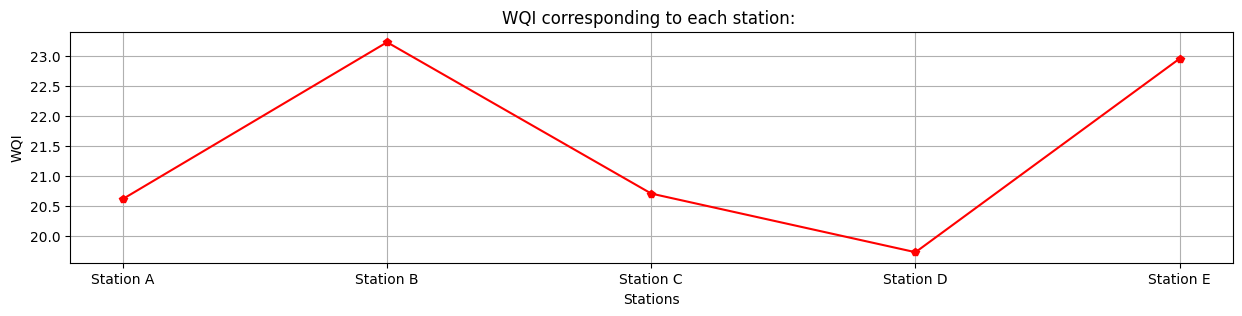

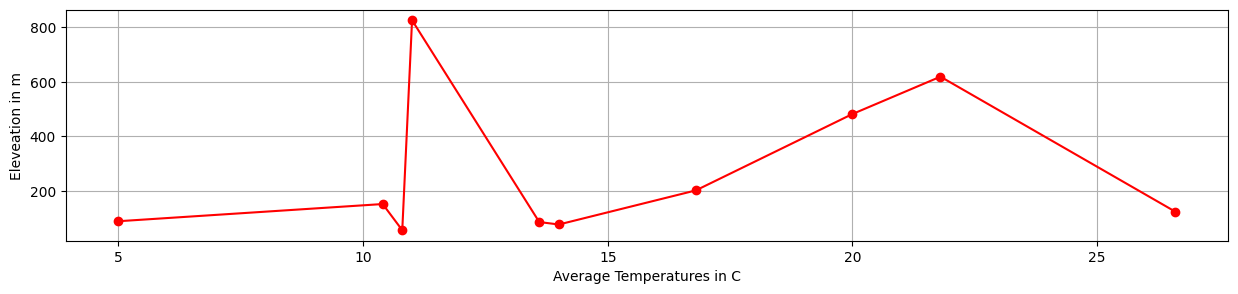

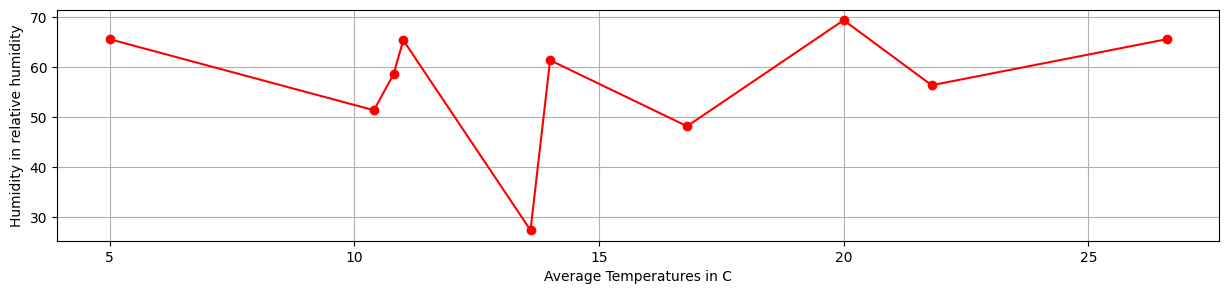

In [116]:
#TASK 4

import torch
import matplotlib.pyplot as plt
import seaborn as sns




stations = ["Station A", "Station B", "Station C", "Station D", "Station E"]


temp_c = torch.randint(-10, 41, (30, 5), dtype=torch.float) 
hum_rh = torch.randint(20, 100, (30, 5), dtype=torch.float)  
rf_mm = torch.randint(0, 30, (30, 5), dtype=torch.float) 

avgt_10 = temp_c[:10].mean(dim=1)
ele_m = torch.randint(50, 900, (10,))
for i in range(10):
    print(f"Elevation: {ele_m[i].item():}m, Temperature: {avgt_10[i].item():.2f} C")
print("\n")
wqi = ((0.5 * temp_c) + (0.3 * hum_rh) - (0.2 * rf_mm)).round(decimals = 2)

awqi = wqi.mean(dim = 0)
id = torch.argmax(awqi).item()

print("The average weather quality index of each station is:")
for i in range(5):
    print(f"{stations[i]} : {awqi[i].item():.2f}")

print(f"\nThe best station to live is (i.e. highest wqi): {stations[id]}")

#5 tensor operations:
#1) awqi = wqi.mean(dim = 0)    (Average wqi)
#2) id = torch.argmax(awqi).item()    (Finding maximum wqi)
#3) avg_hum = hum_rh[:10].mean(dim=1).numpy()    (Finding average humidity for first 10 days)
#4) avgt_10 = temp_c[:10].mean(dim=0)     (Finding everage temperature for first 10 days per station)
#5) avgt_10_2 = temp_c[:10].mean(dim = 1)   (Finding average temperature for first 10 days for each day)

#Now I will use these above tensors to plot 3 graphs

#GRAPH 1 : WQI vs Station

plt.figure(figsize=(15, 3))
plt.plot([f"{stations[i]}" for i in range(5)], awqi.numpy(), marker='p', color='r')

plt.xlabel("Stations")
plt.ylabel("WQI")
plt.title("WQI corresponding to each station: ")

plt.grid(True)
plt.show()


#GRAPH 2 :  Temperature vs Elevation

si = avgt_10.numpy().argsort()
temp_new = avgt_10.numpy()[si]
plt.figure(figsize = (15,3))
plt.plot(temp_new, ele_m.numpy(), marker = 'o',  color = 'r')
plt.xlabel("Average Temperatures in C")
plt.ylabel("Eleveation in m")

plt.grid(True)
plt.show()


#GRAPH 3 : Humidity vs temperature for first 10 days

avg_hum = hum_rh[:10].mean(dim=1).numpy()
avgt_10_2 = temp_c[:10].mean(dim = 1)
si = avgt_10_2.numpy().argsort()
temp_new = avgt_10_2.numpy()[si]
plt.figure(figsize = (15,3))
plt.plot(temp_new, avg_hum, marker = 'o', color = 'r')
plt.xlabel("Average Temperatures in C")
plt.ylabel("Humidity in relative humidity")

plt.grid(True)
plt.show()